In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arcpy
from arcgis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [4]:
zi_2050_1 = pd.read_csv(r"E:\REMM\REMMRun_0\zone_indicators_2179_2050.csv")
zi_2050_2 = pd.read_csv(r"E:\Projects\REMM2_For_Python3_MAX_SPRAWL\REMMRun\zone_indicators_131_2050.csv")

zi_2040_1 = pd.read_csv(r"E:\REMM\REMMRun_0\zone_indicators_2179_2040.csv")
zi_2040_2 = pd.read_csv(r"E:\Projects\REMM2_For_Python3_MAX_SPRAWL\REMMRun\zone_indicators_131_2040.csv")

In [5]:
zi_2050_1.columns

Index(['zone_id', 'households', 'residential_units', 'population',
       'res_price1', 'res_price2', 'avg_hh_income', 'hh_inc1', 'hh_inc2',
       'hh_inc3', 'hh_inc4', 'jobs', 'jobs1', 'jobs2', 'jobs3', 'jobs4',
       'jobs5', 'jobs6', 'jobs7', 'jobs8', 'jobs9', 'jobs10', 'job_spaces',
       'non_residential_sqft', 'nonres_price3', 'nonres_price4',
       'nonres_price5', 'COUNTY', 'pop_adjust'],
      dtype='object')

In [6]:
zi_2050_1.shape

(2725, 29)

In [10]:
columns = ['zone_id', 'COUNTY', 'households', 'population', 'jobs', 'residential_units']
zi_2050_1 = zi_2050_1[columns].copy()
zi_2050_2 = zi_2050_2[columns].copy()
zi_2040_1 = zi_2040_1[columns].copy()
zi_2040_2 = zi_2040_2[columns].copy()

In [12]:
merged_2050 = zi_2050_1.merge(zi_2050_2, left_on = 'zone_id', right_on = 'zone_id' , how = 'inner')
merged_2040 = zi_2040_1.merge(zi_2040_2, left_on = 'zone_id', right_on = 'zone_id' , how = 'inner')
merged_2050.head(10)

,zone_id,COUNTY_x,households_x,population_x,jobs_x,residential_units_x,COUNTY_y,households_y,population_y,jobs_y,residential_units_y
0,2859,4,24.0,60.251238,2.0,24.0,49,2549.0,7937.563788,0.0,2549.0
1,141,1,208.0,549.099879,3944.0,234.0,57,151.0,409.682842,933.0,151.0
2,2865,4,30.0,86.662740,46.0,30.0,49,1227.0,4018.614543,46.0,1227.0
3,1914,4,0.0,0.000000,0.0,0.0,49,1044.0,3480.056189,0.0,1044.0
4,2860,4,1.0,1.650719,1.0,1.0,49,1306.0,4219.773860,0.0,1306.0
5,1714,3,754.0,1805.256524,788.0,811.0,35,408.0,937.955167,1326.0,408.0
6,2870,4,40.0,99.868491,68.0,42.0,49,65.0,202.073678,0.0,65.0
7,1413,3,2026.0,6685.847079,478.0,2070.0,35,2088.0,7706.310145,535.0,2088.0
8,912,3,1728.0,4750.038000,1015.0,1789.0,35,1782.0,5548.425815,659.0,1782.0
9,1423,3,1680.0,5305.102506,139.0,1690.0,35,1694.0,6060.482759,144.0,1694.0


In [101]:
merged['nonres_price4_d'] = merged['nonres_price4_x'].astype(float) - merged['nonres_price4_y'].astype(float)

In [102]:
merged2 = merged[(merged['nonres_price4_d'] >= 2) | (merged['nonres_price4_d'] <= -2)]
merged2.to_csv(r'./Results/nonres_price4.csv', index = False)
merged2.shape

(142, 14)

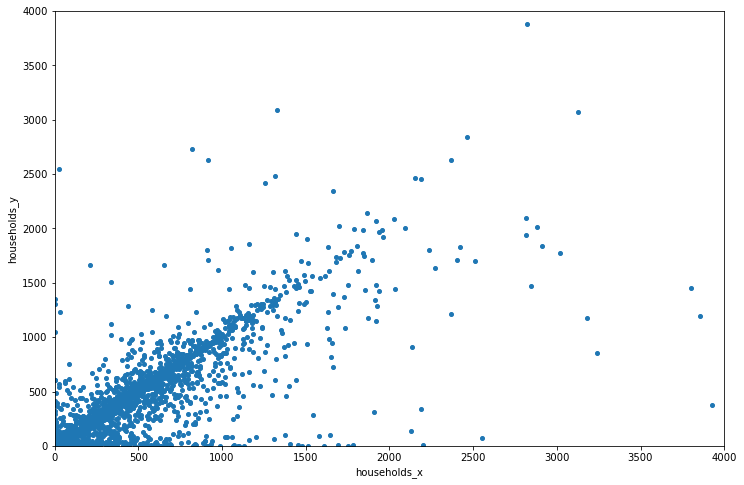

In [20]:
merged.plot.scatter(x='households_x', y= 'households_y', figsize=(12,8), s=16, xlim=(0,4000), ylim=(0,4000))

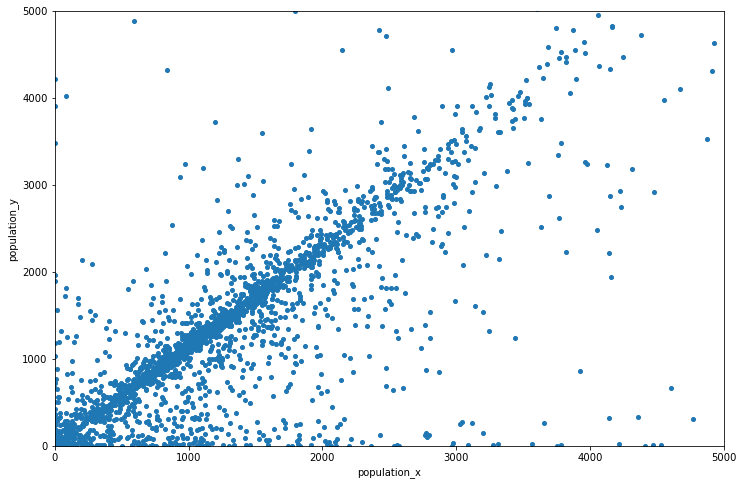

In [18]:
merged.plot.scatter(x='population_x', y= 'population_y', figsize=(12,8), s=16, xlim=(0,5000), ylim=(0,5000))

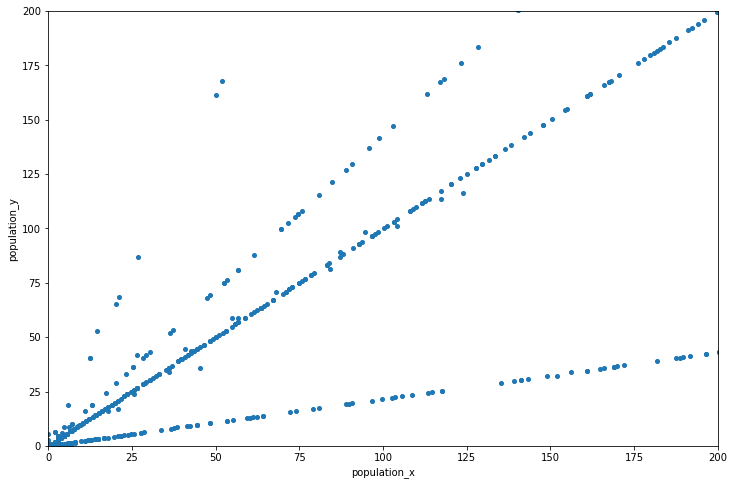

In [105]:
merged.plot.scatter(x='population_x', y= 'population_y', figsize=(12,8), s=16, xlim=(0,200), ylim=(0,200))

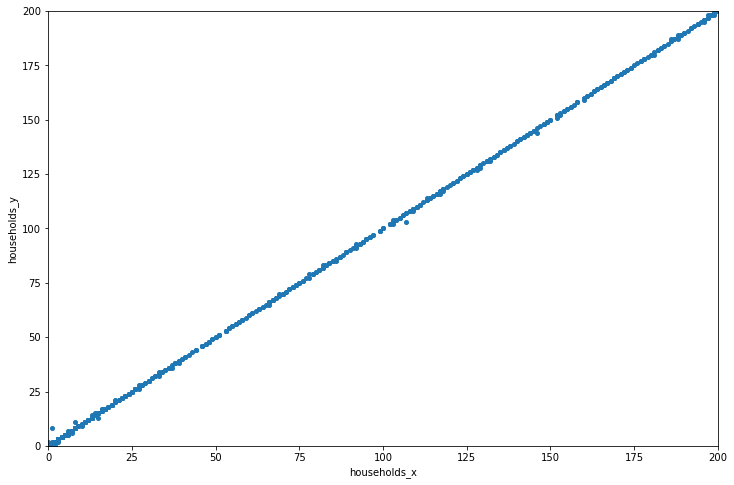

In [106]:
merged.plot.scatter(x='households_x', y= 'households_y', figsize=(12,8), s=16, xlim=(0,200), ylim=(0,200))